In [376]:
import pandas as pd
import numpy as np
import pylab as pl
from statistics import mode
from sklearn.linear_model import LogisticRegression
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In this EDA, we want to look into the different data captured and analyze what are some possible ways to identify whether that data was collected while a user was 

In [377]:
#in order to use the class generated data, need to link to dsmlp server
filepath = '/teams/DSC180A_FA20_A00/b05vpnxray/data/unzipped'
data = os.listdir(filepath)

In [378]:
# for file in data:
#     df = pd.read_csv('/teams/DSC180A_FA20_A00/b05vpnxray/data/unzipped' + file)
    

In [379]:
def filter_out(x):
    #df = pd.read_csv('/teams/DSC180A_FA20_A00/b05vpnxray/data/unzipped/' + x)
    ##print(len(df))
    return ('._' in x) or (' ' in x)

def filter_out_table():
    filepath = '/teams/DSC180A_FA20_A00/b05vpnxray/data/unzipped'
    data = os.listdir(filepath)
    df = pd.DataFrame({"input": data})
    df['remove'] = df['input'].apply(filter_out)
    df = df[df['remove'] == False]
    df = df.drop(columns = ["remove"])
    df.reset_index(drop=True, inplace=True)
    return df

In [380]:
#df = df[df['remove'] == False]

In [381]:

# df = df.drop(columns = ["remove"])
# df.reset_index(drop=True, inplace=True)
# df

In [382]:
#we want to make a dataset in order to train the model 
#one column with input, and other with classifier


In [383]:
def classify_training(x):
    return ('novideo' in x) or ('browsing' in x) or ('internet' in x)
    

def table_output_col(df):
    
    df['output'] = df['input'].apply(classify_training).replace({True: 'Not Streaming', False: 'Streaming'})
    return df

In [384]:
model_df = table_output_col(filter_out_table())
model_df

,input,output
0,zij034(1)-novideo-novpn-windows-20201101.csv,Not Streaming
1,maqader-netflix-1x-vpn-mac-clean-20201102c.csv,Streaming
2,zij034(1)_youtube_1x_xpn_windows_clean_2020110...,Streaming
3,shs214-novpn-browsing-4.csv.csv,Not Streaming
4,dagong-youtube-1x-vpn-mac-clean-20201031-1.csv,Streaming
...,...,...
184,arv020(6)-youtube[480]-1x-vpn-mac-clean-202011...,Streaming
185,jeq004_general_internet_novpn_mac_clean_202011...,Not Streaming
186,dyaseen-HBOMAX-1-vpn-windows-clean-20201102.csv,Streaming
187,jeq004_netflix_1080p_1x_novpn_mac_clean_202010...,Streaming


In [385]:
#internet browsing data collection with VPN
# int1 = pd.read_csv('Week4-datafiles/arv020(1)-novideo-vpn-mac-20201101.csv')
# int2 = pd.read_csv('Week4-datafiles/arv020(2)-novideo-vpn-mac-20201101.csv')
# int3 = pd.read_csv('Week4-datafiles/arv020(3)-novideo-vpn-mac-20201101.csv')

In [386]:
#video streaming data collection with VPN
# vid1 = pd.read_csv('Week4-datafiles/arv020(1)-youtube[480]-1x-vpn-mac-clean-20201101.csv')
# vid2 = pd.read_csv('Week4-datafiles/arv020(2)-youtube[480]-1x-vpn-mac-clean-20201101.csv')
# vid3 = pd.read_csv('Week4-datafiles/arv020(3)-youtube[480]-1x-vpn-mac-clean-20201101.csv')

In the extended version of network_stats that was provided to us by viasat, we can see there are a couple extra rows of data. These rows include ["packet_times", "packet_sizes", "packet_dirs"]

In [387]:
#int1[["Time", "packet_sizes", "packet_dirs"]]

Below we are data scraping the last two columns in order to analyze and look at the two types of network movements/flows (1-2,2-1)

## Modify Data

In [388]:
def modify_data(raw_data):
    #we are separating the column "packet sizes"
    new_pksize = []
    for i in raw_data["packet_sizes"]:
        arr = i.split(";")
        for j in arr[:-1]:
            new_pksize.append(j)

    #we are separating the column "packet dir"
    new_pkdir = []
    for i in raw_data["packet_dirs"]:
        arr = i.split(";")
        for j in arr[:-1]:
            new_pkdir.append(j)

    modified_data = pd.DataFrame({'packet_sizes': pd.to_numeric(new_pksize), 'packet_dir': pd.to_numeric(new_pkdir)})
    return modified_data

In [389]:
# mod_int1= modify_data(int1)
# mod_int2= modify_data(int2)
# mod_int3= modify_data(int3)
# mod_vid1= modify_data(vid1)
# mod_vid2= modify_data(vid2)
# mod_vid3= modify_data(vid3)

In [390]:
def pktdir_vs_pktsze_int(modified_data):
    modified_data[modified_data["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
    modified_data[modified_data["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
    pl.title('Packet Directions vs Packet Size: internet browsing data with VPN')
    pl.xlabel('Packet Size')
    pl.ylabel('Frequency')
    pl.legend(["1->2", "2->1"])
#pktdir_vs_pktsze_int(modify_data(int1))

In [391]:
#pktdir_vs_pktsze_int(modify_data(int2))

In [392]:
#pktdir_vs_pktsze_int(modify_data(int3))

In [393]:
def pktdir_vs_pktsze_vid(modified_data):
    modified_data[modified_data["packet_dir"] == 1]["packet_sizes"].plot(kind = "hist")
    modified_data[modified_data["packet_dir"] == 2]["packet_sizes"].plot(kind = "hist")
    pl.title('Packet Directions vs Packet Size: video streaming data with VPN')
    pl.xlabel('Packet Size')
    pl.ylabel('Frequency')
    pl.legend(["1->2", "2->1"])
    
#pktdir_vs_pktsze_vid(modify_data(vid1))

In [394]:
#pktdir_vs_pktsze_vid(modify_data(vid2))


In [395]:
#mod_int1[mod_int1["packet_sizes"] >= 1400]

In [396]:
#mod_int2[mod_int2["packet_sizes"] >= 1400]

In [397]:
#mod_int3[mod_int3["packet_sizes"] >= 1400]

In [398]:
#mod_vid2[mod_vid2["packet_sizes"] >= 1400]

In [399]:
#pktdir_vs_pktsze_vid(modify_data(vid3))

In [400]:
#Analysis of portion os packetsizes

In [401]:
#this function plots the first x proportion of packet_Sizes that appear in the data
def prop_pksize(tbl, percent):
    tbl["index"] = tbl.index
    up_to = tbl.size*percent
    tbl[:int(up_to)].plot.scatter("index", "packet_sizes")
    

In [402]:
# prop_pksize(mod_int1, .10)
# prop_pksize(mod_int2, .10)
# prop_pksize(mod_int3, .10)

In [403]:
# prop_pksize(mod_vid1, .10)
# prop_pksize(mod_vid1, .20)
# prop_pksize(mod_vid1, .50)

In [404]:
# prop_pksize(mod_vid2, .10)
# prop_pksize(mod_vid3, .10)

maybe we can make a feature that looks at the first 10% of packets coming through 
and look at last 10% of sizes coming through 

we can also look at first 10,000 packets 

This function is looking at the patterns of the first x points in the datset 

In [405]:
def num_pksize(tbl, num_points):
    tbl["index"] = tbl.index
    tbl[:num_points].plot.scatter("index", "packet_sizes")

In [406]:
# num_pksize(mod_int1, 10000)
# num_pksize(mod_int2, 10000)
# num_pksize(mod_int3, 10000)

In [407]:
# num_pksize(mod_vid1, 10000)
# num_pksize(mod_vid2, 10000)
# num_pksize(mod_vid3, 10000)

From here we are able to see that streaming data has a lot more of packet sizes that are of larger size. From there we are able to look at the means of the packet sizes for each scenario and be able to use that as a value of comparison for the features that are going to be put into the machine learning model/classifier.

Here we are continuing to look at perform EDA by looking at mean, STD, max, min values of the datasets

In [408]:
# print("The mean of packet_sizes for a non streaming is: " + str(mod_int1.describe()["packet_sizes"][1]))
# print("The mean of packet_sizes for a non streaming is: " + str(mod_int2.describe()["packet_sizes"][1]))
# print("The mean of packet_sizes for a non streaming is: " + str(mod_int3.describe()["packet_sizes"][1]))

In [409]:
# print("The std of packet_sizes for a non streaming is: " + str(mod_int1.describe()["packet_sizes"][2]))
# print("The std of packet_sizes for a non streaming is: " + str(mod_int2.describe()["packet_sizes"][2]))
# print("The std of packet_sizes for a non streaming is: " + str(mod_int3.describe()["packet_sizes"][2]))

In [410]:
# print("The mean of packet_sizes for streaming is: " + str(mod_vid1.describe()["packet_sizes"][1]))
# print("The mean of packet_sizes for streaming is: " + str(mod_vid2.describe()["packet_sizes"][1]))
# print("The mean of packet_sizes for streaming is: " + str(mod_vid3.describe()["packet_sizes"][1]))

In [411]:
# print("The std of packet_sizes for streaming is: " + str(mod_vid1.describe()["packet_sizes"][2]))
# print("The std of packet_sizes for streaming is: " + str(mod_vid2.describe()["packet_sizes"][2]))
# print("The std of packet_sizes for streaming is: " + str(mod_vid3.describe()["packet_sizes"][2]))

In [412]:
#mod_int1[["packet_sizes", "packet_dir"]]#.value_counts("packet_dir")

In [413]:
# int2.plot("Time", "1->2Bytes")
# int2.plot("Time", "2->1Bytes")

In [414]:
#int3.plot("Time", "1->2Bytes")

In [415]:
#vid1.plot("Time", "1->2Bytes")

In [416]:
#vid2.plot("Time", "1->2Bytes")

In [417]:
#vid3.plot("Time", "1->2Bytes")

In [418]:
#lets look at frequency proportion of 1-> packets in [200-400 range]

In [419]:
#prop_range200_400_dir1(mod_int1)

## Feature Engineering

## Feature #1: proportion of packet sizes from 0-200 size 
this is comparing the proportion of upload vs download packets in the 0-200 size range

In [420]:
def prop_pksize_dir12(tbl):
    proportion = tbl[tbl["packet_sizes"] < 200]["packet_dir"].value_counts()[2]/ tbl[tbl["packet_sizes"] < 200]["packet_dir"].value_counts()[1]
    
    return proportion
#     if proportion < .15:
#         return "Streaming"
#     else:
#         return "Not Streaming"

In [421]:
#prop_pksize_dir12(data[0])

## feature taken out

1. take into account the mean of the packet sizes for the data set (binary column)

0 = if mean of packet_sizes is < 500, not streaming(found from datasets of video streaming and internet browsing on vpn)

1 = if mean of packet_sizes is > 500, streaming

the idea here is that is a lot of packet sizes are larger than 500, it is video streaming. 


This function returns a new column (series) of binary (0/1) data 
**make sure parameter data is modified and split (one packet size per row)

In [422]:
def binarymean_packetsizes(modified_data):
    output = (modified_data["packet_sizes"] > 400).replace({True: 1, False: 0}).value_counts().index[0]#.replace({1: "Streaming", 0: "Not Streaming"})
    if output == 1:
        return "Streaming"
    else:
        return "Not Streaming"

## Feature #2: Binary Min

When looking at the min/max of the packet_sizes for the activity, I noticed that the min value of packet_sizes was always 32 for video streaming. VS for internet browsing, it never got under 36. For that reason I want to see if this feature adds some accuracy to the model. 

0 = greater than 32 (not streaming)

1 = 32 or less (streaming)

In [423]:
def binarymin_packetsizes(modified_data):
    output = (modified_data["packet_sizes"].min() <= 32)
    if output == 1:
        return "Streaming"
    else:
        return "Not Streaming"
    #return modified_data["packet_sizes"].min()

## Feature 3: max packet_size 

In [424]:
def binary_max_pksz(tbl):
    num_packets = tbl[tbl["packet_sizes"] >= 1400].size
    
   
    if num_packets > 0:
        return "Streaming"
    else:
        return "Not Streaming"

In [425]:
#binary_max_pksz(mod_int1)

In [426]:
#binary_max_pksz(mod_vid1)

## Feature 4: Looked at the proportion of upload packet sizes in range [200-400]

In [427]:
def prop_range200_400_dir1(tbl):
    a = len(tbl[(tbl["packet_sizes"] > 200) & (tbl["packet_sizes"] < 600) & (tbl["packet_dir"] == 1)])
    b = len(tbl[tbl["packet_dir"] == 1])
    return a/b
#     if (a/b) < .15:
#         return "Not Streaming"
#     else:
#         return "Streaming"

## Feature 5: proportion of pksize 0-200 compared to all

In [428]:
def prop_200toentire(tbl):
    proportion = tbl[tbl["packet_sizes"] < 200]["packet_dir"].size/tbl["packet_sizes"].size
    return proportion

# Feature 6: proportion of pksize >1200 compared to all 

In [429]:
def prop_1200toentire(tbl):
    proportion = tbl[tbl["packet_sizes"] > 1200]["packet_dir"].size/tbl["packet_sizes"].size
    return proportion

## Classifier

In [430]:
def classifier(raw_data):
    raw_data = pd.read_csv('/teams/DSC180A_FA20_A00/b05vpnxray/data/unzipped/' + raw_data)
    
    #should input features that take data as a parameter
    #this will create a list of 1/0 's
    feature1 = prop_pksize_dir12(modify_data(raw_data))
    feature2 = binarymin_packetsizes(modify_data(raw_data))
    feature3 = binary_max_pksz(modify_data(raw_data))
    feature4 = prop_range200_400_dir1(modify_data(raw_data))
    feature5 = prop_200toentire(modify_data(raw_data))
    feature6 = prop_1200toentire(modify_data(raw_data))
   
    output =  [feature1, feature2, feature3, feature4, feature5, feature6]
    return output#.replace({"Not Streaming":0, "Streaming" : 1})

In [431]:
#classifier(model_df['input'][12])

In [432]:
#this builds the model and prepares the dataset for logistic regression

def build_df(df):
    ft1 = []
    ft2 = []
    ft3 = []
    ft4 = []
    ft5 = []
    ft6 = []

    for i in range(len(df['input'])):
        fts = classifier(df['input'][i])

        ft1.append(fts[0])
        ft2.append(fts[1])
        ft3.append(fts[2])
        ft4.append(fts[3])
        ft5.append(fts[4])
        ft6.append(fts[5])


    df['feature1'] = ft1
    df['feature2'] = ft2
    df['feature3'] = ft3
    df['feature4'] = ft4
    df['feature5'] = ft5
    df['feature6'] = ft6
    
    return df
    


In [433]:
model_df

,input,output
0,zij034(1)-novideo-novpn-windows-20201101.csv,Not Streaming
1,maqader-netflix-1x-vpn-mac-clean-20201102c.csv,Streaming
2,zij034(1)_youtube_1x_xpn_windows_clean_2020110...,Streaming
3,shs214-novpn-browsing-4.csv.csv,Not Streaming
4,dagong-youtube-1x-vpn-mac-clean-20201031-1.csv,Streaming
...,...,...
184,arv020(6)-youtube[480]-1x-vpn-mac-clean-202011...,Streaming
185,jeq004_general_internet_novpn_mac_clean_202011...,Not Streaming
186,dyaseen-HBOMAX-1-vpn-windows-clean-20201102.csv,Streaming
187,jeq004_netflix_1080p_1x_novpn_mac_clean_202010...,Streaming


In [434]:
model_df = build_df(model_df)
model_df

,input,output,feature1,feature2,feature3,feature4,feature5,feature6
0,zij034(1)-novideo-novpn-windows-20201101.csv,Not Streaming,0.271567,Not Streaming,Streaming,0.043136,0.458771,0.507159
1,maqader-netflix-1x-vpn-mac-clean-20201102c.csv,Streaming,0.047581,Streaming,Not Streaming,0.008515,0.176486,0.805142
2,zij034(1)_youtube_1x_xpn_windows_clean_2020110...,Streaming,0.034231,Not Streaming,Not Streaming,0.021977,0.415074,0.570288
3,shs214-novpn-browsing-4.csv.csv,Not Streaming,0.973299,Not Streaming,Streaming,0.088907,0.487308,0.338622
4,dagong-youtube-1x-vpn-mac-clean-20201031-1.csv,Streaming,0.099291,Streaming,Not Streaming,0.150706,0.362297,0.565142
...,...,...,...,...,...,...,...,...
184,arv020(6)-youtube[480]-1x-vpn-mac-clean-202011...,Streaming,0.103331,Streaming,Streaming,0.514547,0.291306,0.307952
185,jeq004_general_internet_novpn_mac_clean_202011...,Not Streaming,0.463788,Streaming,Streaming,0.115323,0.497486,0.396808
186,dyaseen-HBOMAX-1-vpn-windows-clean-20201102.csv,Streaming,0.015650,Not Streaming,Streaming,0.009136,0.345326,0.648319
187,jeq004_netflix_1080p_1x_novpn_mac_clean_202010...,Streaming,0.133723,Streaming,Streaming,0.070731,0.374298,0.575392


# Model #1: Logistic Regression 

In [435]:
df = model_df.replace({"Not Streaming":0, "Streaming":1})

In [436]:
df.head()

,input,output,feature1,feature2,feature3,feature4,feature5,feature6
0,zij034(1)-novideo-novpn-windows-20201101.csv,0,0.271567,0,1,0.043136,0.458771,0.507159
1,maqader-netflix-1x-vpn-mac-clean-20201102c.csv,1,0.047581,1,0,0.008515,0.176486,0.805142
2,zij034(1)_youtube_1x_xpn_windows_clean_2020110...,1,0.034231,0,0,0.021977,0.415074,0.570288
3,shs214-novpn-browsing-4.csv.csv,0,0.973299,0,1,0.088907,0.487308,0.338622
4,dagong-youtube-1x-vpn-mac-clean-20201031-1.csv,1,0.099291,1,0,0.150706,0.362297,0.565142


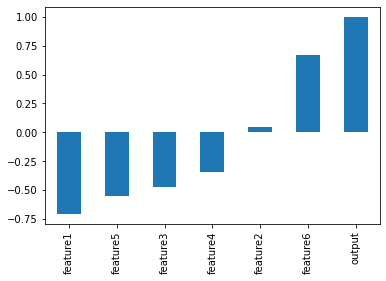

In [437]:
df.corr()['output'].sort_values().plot.bar()


In [438]:
# def build_model(df):
    
X = df.drop(columns = ["output", 'input'])
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [439]:
reg = LogisticRegression(random_state=0).fit(X_train, y_train)
accuracy_score(y_test.values, reg.predict(X_test))

0.8333333333333334

In [440]:
accuracy_score(y_train.values, reg.predict(X_train))

0.9361702127659575

In [445]:
y_actual = y
y_pred = reg.predict(X)
confusion_matrix(y_actual, y_pred)

array([[86,  9],
       [ 8, 86]])

In [446]:
test_df = pd.DataFrame(columns = [1, 2, 3, 4])
test_df.loc[0] = classifier(df['input'][90])

ValueError: cannot set a row with mismatched columns

In [ ]:
test_df.replace({"Not Streaming":0, "Streaming" : 1})

In [ ]:
reg.predict(test_df.replace({"Not Streaming":0, "Streaming" : 1}))[0]

In [ ]:
#we can see there are more false negatives than false positives
#more cases where we think no streaming, when actually streaming
tn = 68
fp = 11
fn = 20
tp = 74

In [ ]:
y_actual = y
y_pred = reg.predict(X)
confusion_matrix(y_actual, y_pred)

In [ ]:
y_actual = y_test
y_pred = reg.predict(X_test)
confusion_matrix(y_actual, y_pred)

## Model #2: Random Forest Tree 

In [455]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
accuracy_score(y_test.values, clf.predict(X_test))

0.8541666666666666

In [456]:
accuracy_score(y_train.values, clf.predict(X_train))

0.9432624113475178

In [457]:
y_actual = y
y_pred = clf.predict(X)
confusion_matrix(y_actual, y_pred)

array([[86,  9],
       [ 6, 88]])

In [458]:
y_actual = y_test
y_pred = clf.predict(X_test)
confusion_matrix(y_actual, y_pred)

array([[21,  4],
       [ 3, 20]])

## Model #3: KNN Claasifier

In [459]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy_score(y_test.values, knn.predict(X_test))

0.8333333333333334

In [460]:
accuracy_score(y_train.values, knn.predict(X_train))

0.950354609929078

In [461]:
y_actual = y
y_pred = knn.predict(X)
confusion_matrix(y_actual, y_pred)

array([[89,  6],
       [ 9, 85]])

In [462]:
y_actual = y_test
y_pred = knn.predict(X_test)
confusion_matrix(y_actual, y_pred)

array([[21,  4],
       [ 4, 19]])